In [2]:
# Import libraries and dependencies
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from MCForecastTools import MCSimulation

In [3]:
data = yf.download(  # or pdr.get_data_yahoo(...
        # tickers list or string as well
        tickers = ["XRP-USD", "ETH-USD"],

        # use "period" instead of start/end
        # valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
        # (optional, default is '1mo')
        period = "7y",

        # fetch data by interval (including intraday if period < 60 days)
        # valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
        # (optional, default is '1d')
        interval = "1d",

        # group by ticker (to access via data['SPY'])
        # (optional, default is 'column')
        group_by = 'ticker',

        # adjust all OHLC automatically
        # (optional, default is False)
        auto_adjust = True,

        # download pre/post regular market hours data
        # (optional, default is False)
        prepost = True,

        # use threads for mass downloading? (True/False/Integer)
        # (optional, default is True)
        threads = True,

        # proxy URL scheme use use when downloading?
        # (optional, default is None)
        proxy = None
    )

[*********************100%***********************]  2 of 2 completed


In [4]:
data.index = pd.to_datetime(data.index)
data.head()

ETH-USD                         XRP-USD                      \
              Open High Low Close Volume      Open      High       Low   
Date                                                                     
2014-09-17     NaN  NaN NaN   NaN    NaN  0.005123  0.005803  0.005123   
2014-09-18     NaN  NaN NaN   NaN    NaN  0.005398  0.005521  0.005091   
2014-09-19     NaN  NaN NaN   NaN    NaN  0.005134  0.005167  0.004873   
2014-09-20     NaN  NaN NaN   NaN    NaN  0.004942  0.004954  0.004736   
2014-09-21     NaN  NaN NaN   NaN    NaN  0.004768  0.004791  0.004540   

                               
               Close   Volume  
Date                           
2014-09-17  0.005399  1281960  
2014-09-18  0.005135   491147  
2014-09-19  0.004942   407109  
2014-09-20  0.004772   322621  
2014-09-21  0.004570   309571

In [12]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
data=data.dropna()
MC_even_dist = MCSimulation(
    portfolio_data = data,
    weights = [0,1],
    num_simulation = 1000,
    num_trading_days = 252*10
)
MC_even_dist.portfolio_data.head()

ETH-USD                                                        \
                Open      High       Low     Close     Volume daily_return   
Date                                                                         
2015-08-07  2.831620  3.536610  2.521120  2.772120   164329.0          NaN   
2015-08-08  2.793760  2.798810  0.714725  0.753325   674188.0    -0.728250   
2015-08-09  0.706136  0.879810  0.629191  0.701897   532170.0    -0.068268   
2015-08-10  0.713989  0.729854  0.636546  0.708448   405283.0     0.009333   
2015-08-11  0.708087  1.131410  0.663235  1.067860  1463100.0     0.507323   

             XRP-USD                                                     
                Open      High       Low     Close  Volume daily_return  
Date                                                                     
2015-08-07  0.008020  0.008153  0.007989  0.008152  363643          NaN  
2015-08-08  0.008164  0.008708  0.008164  0.008476  678295     0.039745  
2015-08-09  0.008484  0.008823  0.008472  0.008808  531969     0.039169  
2015-08-10  0.008812  0.008905  0.008746  0.008750  472973    -0.006585  
2015-08-11  0.008751  0.008766  0.008591  0.008591  282461    -0.018171

In [13]:
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.943458,1.138823,0.926257,0.954165,0.955424,1.034244,0.989613,1.004224,1.020875,1.072118,...,0.888137,0.931177,0.987958,1.049383,1.227663,1.046061,1.043584,1.222313,0.877608,1.121700
2,0.937303,1.092470,0.907664,0.970292,0.980296,1.058715,1.087585,1.042195,1.003508,0.989373,...,1.029564,0.865652,1.017046,1.234669,1.105773,0.937293,1.177973,1.094761,0.959107,1.144211
3,0.988279,1.095898,1.027449,0.978495,1.064350,1.192078,1.229013,1.141950,0.965349,1.035571,...,1.060441,0.912646,0.999170,1.327112,1.110855,0.938097,1.168454,1.247277,0.937826,1.063250
4,1.175847,1.226803,1.113860,0.919725,0.905154,1.106862,1.365472,1.199738,0.921785,1.152758,...,1.129642,0.841653,0.835100,1.260982,1.099595,1.014404,1.099597,1.227257,0.910267,1.106470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,0.517482,838.954450,6.996958,11.543530,6150.722111,102.149721,0.282173,15.851752,24.713753,0.056060,...,72.263899,0.986298,18.799498,593.571080,182.662216,1.506543,146.029185,2.534100,1482.915381,0.179855
2517,0.589946,829.807204,7.262725,11.519853,6013.792881,106.040422,0.281039,17.050706,22.222922,0.054743,...,76.277686,0.947878,19.435209,552.097659,171.826541,1.716051,146.789588,2.726789,1258.525103,0.214531
2518,0.670259,945.364305,7.546142,11.988031,5494.192146,107.397723,0.259091,14.606767,21.865220,0.063818,...,68.216315,1.052632,20.882501,517.352179,180.769404,1.781513,140.956121,2.629010,1148.346643,0.197476
2519,0.743205,879.867660,8.196072,12.189835,5492.142551,98.273954,0.241488,13.334628,22.596789,0.073765,...,62.075445,1.144126,22.931368,369.459046,192.539723,1.637149,132.671692,2.635078,1093.651562,0.188457


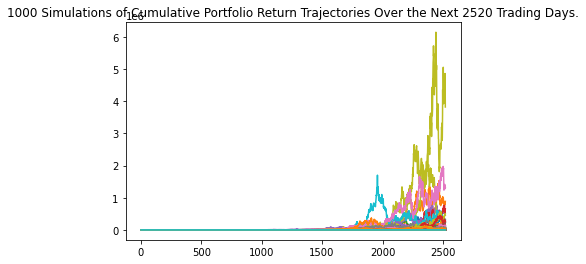

In [14]:
line_plot = MC_even_dist.plot_simulation()

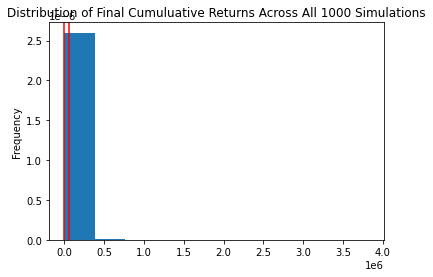

In [15]:
# Plot probability distribution and confidence intervals
att_dist_plot = MC_even_dist.plot_distribution()

In [18]:
# Fetch summary statistics from the Monte Carlo simulation results
att_tbl = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
print(att_tbl)

count           1.000000e+03
mean            1.259237e+04
std             1.362188e+05
min             4.032010e-05
25%             2.428430e+00
50%             3.884453e+01
75%             5.348294e+02
max             3.823548e+06
95% CI Lower    2.336939e-02
95% CI Upper    6.266268e+04
Name: 2520, dtype: float64


In [19]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $15,000 investments
att_ci_lower = round(att_tbl[8]*15000,2)
att_ci_upper = round(att_tbl[9]*15000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $15,000 in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${att_ci_lower} and ${att_ci_upper}.")

There is a 95% chance that an initial investment of $15,000 in the portfolio over the next 5 years will end within in the range of $350.54 and $939940157.98.


In [26]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
data=data.dropna()
MC_even_dist = MCSimulation(
    portfolio_data = data,
    weights = [0,1],
    num_simulation = 1000,
    num_trading_days = 252*5
)
MC_even_dist.portfolio_data.head()

ETH-USD                                                        \
                Open      High       Low     Close     Volume daily_return   
Date                                                                         
2015-08-07  2.831620  3.536610  2.521120  2.772120   164329.0          NaN   
2015-08-08  2.793760  2.798810  0.714725  0.753325   674188.0    -0.728250   
2015-08-09  0.706136  0.879810  0.629191  0.701897   532170.0    -0.068268   
2015-08-10  0.713989  0.729854  0.636546  0.708448   405283.0     0.009333   
2015-08-11  0.708087  1.131410  0.663235  1.067860  1463100.0     0.507323   

             XRP-USD                                                     
                Open      High       Low     Close  Volume daily_return  
Date                                                                     
2015-08-07  0.008020  0.008153  0.007989  0.008152  363643          NaN  
2015-08-08  0.008164  0.008708  0.008164  0.008476  678295     0.039745  
2015-08-09  0.008484  0.008823  0.008472  0.008808  531969     0.039169  
2015-08-10  0.008812  0.008905  0.008746  0.008750  472973    -0.006585  
2015-08-11  0.008751  0.008766  0.008591  0.008591  282461    -0.018171

In [27]:
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.050146,0.876944,1.002280,0.966816,1.046507,1.178657,0.992409,0.890964,1.039891,1.088387,...,1.205523,1.052934,1.071012,1.111753,0.897613,0.997425,0.959974,1.070166,1.055801,0.907984
2,1.130227,0.894662,1.032206,0.945292,1.020985,1.178605,1.101871,0.857474,1.106410,1.088488,...,1.176477,0.989934,1.093794,1.032873,0.877701,1.027971,0.911880,0.932900,1.181374,0.998765
3,1.082490,0.822518,1.006466,0.928053,0.926713,1.116864,1.198887,0.745674,1.172395,1.140829,...,1.002890,1.039686,1.186609,1.050874,0.895794,1.026728,0.937736,0.891470,1.181183,1.039213
4,1.158451,0.753237,0.978354,0.942690,0.983170,1.158359,1.202161,0.641501,1.266998,1.051646,...,1.032651,1.143983,1.271569,1.102072,0.998726,0.924657,1.015144,0.916257,1.115440,1.018713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,0.066288,76.922694,2.670185,0.731930,3.818963,42.112702,4.529977,2.249305,34.278928,0.818056,...,240.970423,12.144567,5.675223,18.192065,0.472114,0.096797,1.829253,0.752972,22.281725,1999.775346
1257,0.071943,75.219967,2.295681,0.743931,3.758407,38.896273,4.906287,1.879318,34.574838,0.759371,...,241.192043,12.739541,5.616025,18.749242,0.473469,0.098230,1.748335,0.837857,23.723897,1946.315430
1258,0.076692,79.068684,2.279260,0.782103,4.224622,38.764778,4.790365,1.947866,33.969267,0.648019,...,232.262870,13.022867,5.064920,17.546051,0.428041,0.107989,1.630536,0.825115,21.571058,2090.918344
1259,0.088648,80.323753,2.391410,0.877121,4.309306,39.188034,5.612978,1.920316,37.892388,0.668937,...,244.719552,12.931033,5.171683,18.154954,0.388225,0.115984,1.783316,0.739060,22.896740,2021.600375


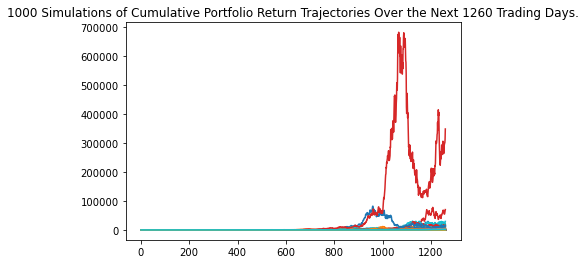

In [28]:
# Plot simulation outcomes
line_plot = MC_even_dist.plot_simulation()

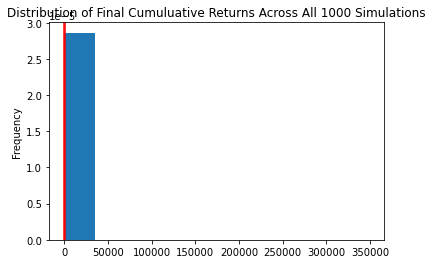

In [29]:
# Plot probability distribution and confidence intervals
att_dist_plot = MC_even_dist.plot_distribution()

In [30]:
# Fetch summary statistics from the Monte Carlo simulation results
att_tbl = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
print(att_tbl)

count             1000.000000
mean               638.215299
std              11341.452915
min                  0.000159
25%                  0.926923
50%                  6.170532
75%                 37.633902
max             348539.423993
95% CI Lower         0.025458
95% CI Upper      1160.306821
Name: 1260, dtype: float64


In [31]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $15,000 investments
att_ci_lower = round(att_tbl[8]*15000,2)
att_ci_upper = round(att_tbl[9]*15000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $15,000 in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${att_ci_lower} and ${att_ci_upper}.")

There is a 95% chance that an initial investment of $15,000 in the portfolio over the next 5 years will end within in the range of $381.87 and $17404602.32.


In [32]:
# Running a Monte Carlo simulation to forecast 15 years cumulative returns
data=data.dropna()
MC_even_dist = MCSimulation(
    portfolio_data = data,
    weights = [0,1],
    num_simulation = 1000,
    num_trading_days = 252*15
)
MC_even_dist.portfolio_data.head()

ETH-USD                                                        \
                Open      High       Low     Close     Volume daily_return   
Date                                                                         
2015-08-07  2.831620  3.536610  2.521120  2.772120   164329.0          NaN   
2015-08-08  2.793760  2.798810  0.714725  0.753325   674188.0    -0.728250   
2015-08-09  0.706136  0.879810  0.629191  0.701897   532170.0    -0.068268   
2015-08-10  0.713989  0.729854  0.636546  0.708448   405283.0     0.009333   
2015-08-11  0.708087  1.131410  0.663235  1.067860  1463100.0     0.507323   

             XRP-USD                                                     
                Open      High       Low     Close  Volume daily_return  
Date                                                                     
2015-08-07  0.008020  0.008153  0.007989  0.008152  363643          NaN  
2015-08-08  0.008164  0.008708  0.008164  0.008476  678295     0.039745  
2015-08-09  0.008484  0.008823  0.008472  0.008808  531969     0.039169  
2015-08-10  0.008812  0.008905  0.008746  0.008750  472973    -0.006585  
2015-08-11  0.008751  0.008766  0.008591  0.008591  282461    -0.018171

In [33]:
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.950511,1.139166,0.993555,1.062577,1.066540,0.921478,0.950003,1.158479,1.040895,0.895008,...,0.908883,1.057150,1.156095,0.976313,1.063447e+00,1.138872,1.091203,0.999758,0.957621,0.937950
2,0.914364,1.102527,0.852924,0.886422,1.049858,0.908826,0.944328,1.113823,1.084705,0.890532,...,0.940344,0.989465,1.174290,0.955738,1.025223e+00,1.235900,0.938000,1.103854,0.882781,0.950262
3,1.105459,1.188991,0.849724,0.958202,0.998981,0.867433,0.955871,1.039476,0.947079,0.912963,...,0.856561,1.031553,1.125918,0.894184,8.786021e-01,1.255047,0.987318,1.079253,0.815250,1.025677
4,1.160724,1.434571,0.899823,0.923910,0.959687,0.917032,0.933932,0.921981,0.985052,0.833277,...,0.855678,1.171173,1.075022,0.874786,8.629780e-01,1.402542,1.005830,1.097880,0.825563,1.066180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3776,328.339483,0.000804,27.406726,31636.287174,56.176956,0.541845,8.061416,594.995633,33674.933474,79.728044,...,144.927280,138.948333,38112.799183,11610.457031,5.408203e+06,605.366916,840.819966,58.271118,1.119235,213.392158
3777,360.054169,0.000823,25.422536,30336.906021,57.887845,0.479621,7.629620,596.095039,35297.208541,80.169908,...,146.894840,113.623736,36348.585529,11323.372588,5.611610e+06,647.449219,849.117161,55.297955,1.064883,200.248358
3778,393.364702,0.000913,27.651987,30919.189991,48.857511,0.526247,8.230373,555.969755,35606.525269,78.100177,...,137.692618,104.794851,35535.703942,11599.984508,5.783435e+06,639.725529,795.293298,56.861052,1.035847,237.892406
3779,404.661809,0.000903,25.622351,30576.165459,49.273279,0.512600,8.053155,599.354815,28508.000424,62.916786,...,121.324635,98.801033,37011.328626,10460.863033,5.782983e+06,564.285132,658.678973,53.938244,1.080700,243.693043


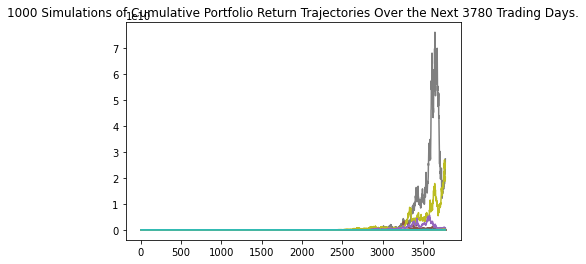

In [34]:
# Plot simulation outcomes
line_plot = MC_even_dist.plot_simulation()

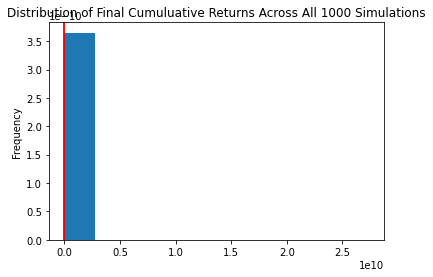

In [35]:
# Plot probability distribution and confidence intervals
att_dist_plot = MC_even_dist.plot_distribution()

In [36]:
# Fetch summary statistics from the Monte Carlo simulation results
att_tbl = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
print(att_tbl)

count           1.000000e+03
mean            4.979761e+07
std             1.075826e+09
min             6.193765e-05
25%             9.194139e+00
50%             2.137694e+02
75%             7.271231e+03
max             2.735630e+10
95% CI Lower    1.437233e-02
95% CI Upper    5.961383e+06
Name: 3780, dtype: float64


In [37]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $15,000 investments
att_ci_lower = round(att_tbl[8]*15000,2)
att_ci_upper = round(att_tbl[9]*15000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $15,000 in the portfolio"
      f" over the next 15 years will end within in the range of"
      f" ${att_ci_lower} and ${att_ci_upper}.")

There is a 95% chance that an initial investment of $15,000 in the portfolio over the next 15 years will end within in the range of $215.58 and $89420746550.19.
